## Q1 - Do the number of hospital admissions differ significantly between weekdays and weekends?

In [244]:
# Imports for DFs & connecting to Postgres
import pandas as pd
import psycopg2

In [245]:
# Connect to Postgres & get all records for ADMISSIONS
try:
    con = psycopg2.connect("host='localhost' dbname='mimic' user='postgres' password='postgres'")
    cur = con.cursor()
    cur.execute ("""SELECT * FROM mimiciii.admissions;""")
    con.commit()
    print('OK')
except Exception as e:
    print(e)  

OK


In [246]:
# Store ADMISSIONS result in var
admissions_all = cur.fetchall()

In [247]:
# Convert ADMISSIONS result to DF
admissions_df = pd.DataFrame(admissions_all, columns = ['row_id','subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
 'admission_type', 'admission_location', 'discharge_location',
 'insurance', 'language', 'religion', 'marital_status', 'ethnicity',
 'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag',
 'has_chartevents_data'])

In [248]:
# Create shortened DF of relevant cols
admission_short = admissions_df[['hadm_id', 'admittime']]

In [249]:
# admission_short.isnull().sum(axis=0)/admission_short.notnull().sum(axis=0)

In [250]:
# Add col indicating the day name for a given admission date, according to MIMIC docs these should be reliable & accurate despite date shifting
admission_short['dayofweek'] = admission_short['admittime'].apply(lambda x: x.day_name())

C:\Users\bcrom\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [251]:
# Group data by day of week with count of admissions
adm_by_days = admission_short.groupby(by='dayofweek').agg({'hadm_id':'count'})
adm_by_days.rename(columns={'hadm_id':'count'}, inplace= True)

In [252]:
# Sort DF for plotting
adm_by_days.sort_values(by='count', ascending= False, inplace= True)

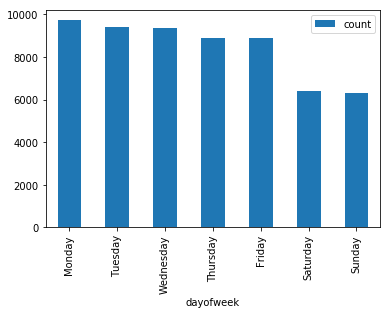

In [253]:
# Plot overall admission counts for day of week
adm_by_days.plot(by='dayofweek', kind='bar');

In [254]:
# Group data by day of week with count of admissions
adm_by_wknd = admission_short.groupby(by='dayofweek').agg({'hadm_id':'count'})
adm_by_wknd.rename(columns={'hadm_id':'count'}, inplace= True)

In [255]:
# Reset index so we can more easily operate on day of week value
adm_by_wknd.reset_index(inplace= True)

In [256]:
# Add new col indicating if day of week is weekend or weekday
adm_by_wknd['weekday_weekend'] = adm_by_wknd['dayofweek'].apply(lambda x: 'weekend' if x == 'Saturday' or x == 'Sunday' else 'weekday')

In [257]:
# Group data into weekdays & weekends with average values
adm_by_type = adm_by_wknd.groupby(by='weekday_weekend').agg({'count':'mean'})
adm_by_type.rename(columns={'count':'avg'}, inplace= True)

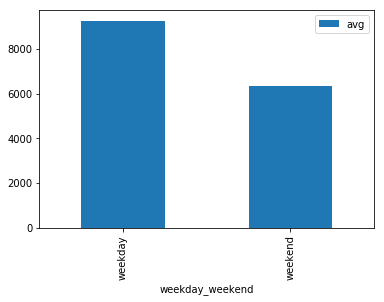

In [258]:
# Plot average weekday admissions versus average weekend admissions
adm_by_type.plot(by='weekday_weekend', kind='bar');